In [856]:
!date

dom ene  5 14:16:06 CET 2020


In [857]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [858]:
# Load work environment

In [859]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data'

In [860]:
#folder = '/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'
folder = os.getcwd()
!ls {folder}

06a_maa_to_m2012.xlsx  09a_maa_to_m2015.xlsx  12a_maa_to_m2018.xlsx
06b_man_to_w2012.xlsx  09b_man_to_w2015.xlsx  12b_man_to_w2018.xlsx
07a_maa_to_m2013.xlsx  10a_maa_to_m2016.xlsx  13a_maa_to_m2019.xlsx
07b_man_to_w2013.xlsx  10b_man_to_w2016.xlsx  13b_man_to_w2019.xlsx
08a_maa_to_m2014.xlsx  11a_maa_to_m2017.xlsx
08b_man_to_w2014.xlsx  11b_man_to_w2017.xlsx


In [861]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data'

In [862]:
# Load library for work and analitics data
import pandas as pd
import numpy as np

In [863]:
!ls -ltr ../01_Original_data

total 18768
-rw-rw-r-- 1 dsc dsc 1290067 dic 26 15:18 06a_maa_to_m2012.xlsx
-rw-rw-r-- 1 dsc dsc 1403666 dic 26 15:20 06b_man_to_w2012.xlsx
-rw-rw-r-- 1 dsc dsc 1235276 dic 26 15:21 07a_maa_to_m2013.xlsx
-rw-rw-r-- 1 dsc dsc 1417179 dic 26 15:22 07b_man_to_w2013.xlsx
-rw-rw-r-- 1 dsc dsc  963040 dic 26 15:23 08a_maa_to_m2014.xlsx
-rw-rw-r-- 1 dsc dsc 1223346 dic 26 15:24 08b_man_to_w2014.xlsx
-rw-rw-r-- 1 dsc dsc  995042 dic 26 15:25 09a_maa_to_m2015.xlsx
-rw-rw-r-- 1 dsc dsc 1109618 dic 26 15:26 09b_man_to_w2015.xlsx
-rw-rw-r-- 1 dsc dsc 1027178 dic 26 15:27 10a_maa_to_m2016.xlsx
-rw-rw-r-- 1 dsc dsc 1173313 dic 26 15:28 10b_man_to_w2016.xlsx
-rw-rw-r-- 1 dsc dsc 1056650 dic 26 15:29 11a_maa_to_m2017.xlsx
-rw-rw-r-- 1 dsc dsc 1123358 dic 26 15:30 11b_man_to_w2017.xlsx
-rw-rw-r-- 1 dsc dsc 1149202 dic 26 15:32 12a_maa_to_m2018.xlsx
-rw-rw-r-- 1 dsc dsc 1261817 dic 26 15:33 12b_man_to_w2018.xlsx
-rw-rw-r-- 1 dsc dsc 1289344 dic 26 15:34 13a_maa_to_m2019.xlsx
-rw-rw-r-- 1 dsc dsc 1477248

In [864]:
# Read from excel files complete with column names stipulated and transform them
# (1) Imports:
import os
import glob

In [865]:
# (2) File list:
path = os.chdir(os.getcwd() + '/..' + '/01_Original_data')
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data


In [866]:
patron_files_xlsx = '*.xlsx'
# Avoid storing entries in memory simultaneously
files_xlsx = sorted(glob.glob(patron_files_xlsx, recursive=True)) 
files_xlsx

['06a_maa_to_m2012.xlsx',
 '06b_man_to_w2012.xlsx',
 '07a_maa_to_m2013.xlsx',
 '07b_man_to_w2013.xlsx',
 '08a_maa_to_m2014.xlsx',
 '08b_man_to_w2014.xlsx',
 '09a_maa_to_m2015.xlsx',
 '09b_man_to_w2015.xlsx',
 '10a_maa_to_m2016.xlsx',
 '10b_man_to_w2016.xlsx',
 '11a_maa_to_m2017.xlsx',
 '11b_man_to_w2017.xlsx',
 '12a_maa_to_m2018.xlsx',
 '12b_man_to_w2018.xlsx',
 '13a_maa_to_m2019.xlsx',
 '13b_man_to_w2019.xlsx']

In [867]:
# (3) Initialize empty dataframe:
df_from_xlsx_total = pd.DataFrame()

In [868]:
%%time
# (4) Loop over the file list to append to an empty dataframe:
for f in files_xlsx:
    df_from_xlsx_parcial = pd.read_excel(f,                          
                          index_col=None,
                          names=['ESTADO', 'CONDADO', 'ORGANIZACION', 'BORRAR'
                                 , 'TIPO_PLAN_GENERICO_MEDICARE', 'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES'
                                 , 'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA'
                                 , 'DETALLE_BENEFICIO', 'BORRAR', 'BORRAR', 'BORRAR'
                                 , 'DESEMBOLSO_MAXIMO', 'CLASIFICACION'])

    df_from_xlsx_total = df_from_xlsx_total.append(df_from_xlsx_parcial, sort=False)

CPU times: user 48 s, sys: 196 ms, total: 48.2 s
Wall time: 48 s


In [869]:
len(df_from_xlsx_total)

306183

In [870]:
df_from_xlsx_total.describe()

,BORRAR.2,BORRAR.3
count,306183.000000,306183.000000
mean,29.594083,0.241081
std,42.374874,1.416832
min,1.000000,0.000000
25%,4.000000,0.000000
50%,12.000000,0.000000
75%,33.000000,0.000000
max,278.000000,24.000000


In [871]:
df_from_xlsx_total.head()

,ESTADO,CONDADO,ORGANIZACION,BORRAR,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,BORRAR.1,BORRAR.2,BORRAR.3,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,AARP MedicareComplete Plan 1 (HMO),Local HMO,$0.00,$0,Enhanced,No Gap Coverage,EA,H0151,1,0,"$4,450",2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Blue Advantage Complete (PPO),Local PPO,$99.00,$130,Basic,No Gap Coverage,BA,H0104,11,5,"$3,400",2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Blue Advantage Premier (PPO),Local PPO,$199.00,$0,Enhanced,No Gap Coverage,EA,H0104,10,3,"$3,400",2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",HealthyAdvantage (HMO),Local HMO *,$0.00,NaN,NaN,NaN,NaN,H0150,12,0,"$3,400",3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",HealthyAdvantage Preferred (HMO),Local HMO,$0.00,$0,Enhanced,Many Generics,EA,H0150,1,0,"$3,400",3


In [872]:
df_from_xlsx_total.shape

(306183, 15)

In [873]:
df_from_xlsx_total.duplicated().sum()

589

In [874]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
BORRAR                              0
TIPO_PLAN_GENERICO_MEDICARE        32
PRIMA_MENSUAL_CONSOLIDADA        2511
MEDICAMS_ANUALES_DEDUCIBLES     79392
TIPO_BENEFICIO                  79392
COBERTURA_ADICIONAL_OFRECIDA    79392
DETALLE_BENEFICIO               79392
BORRAR.1                            0
BORRAR.2                            0
BORRAR.3                            0
DESEMBOLSO_MAXIMO                3389
CLASIFICACION                      32
dtype: int64

In [875]:
# Delete surplus columns that start with:
filtro_borrar = [col for col in df_from_xlsx_total if col.startswith('BORRAR')]
df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_borrar)

In [876]:
df_from_xlsx_total.shape

(306183, 11)

In [877]:
df_from_xlsx_total.head(20)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,Local HMO,$0.00,$0,Enhanced,No Gap Coverage,EA,"$4,450",2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Local PPO,$99.00,$130,Basic,No Gap Coverage,BA,"$3,400",2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,Local PPO,$199.00,$0,Enhanced,No Gap Coverage,EA,"$3,400",2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO *,$0.00,NaN,NaN,NaN,NaN,"$3,400",3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO,$0.00,$0,Enhanced,Many Generics,EA,"$3,400",3
5,Alabama,Autauga,"Healthspring of Alabama, Inc.",Local HMO,$38.00,$0,Enhanced,Many Generics,EA,"$3,400",3
6,Alabama,Autauga,Humana Insurance Company,PFFS,$65.00,$0,Enhanced,Few Generics and Few Brands,EA,"$5,000",Plan too new to be measured
7,Alabama,Autauga,Humana Insurance Company,PFFS *,$0.00,NaN,NaN,NaN,NaN,"$6,700",Plan too new to be measured
8,Alabama,Autauga,Humana Insurance Company,Local PPO,$39.00,$0,Enhanced,Few Generics and Few Brands,EA,"$4,900",2.5
9,Alabama,Autauga,Humana Insurance Company,Regional PPO,$59.00,$320,Basic,No Gap Coverage,DS,"$4,900",3


In [878]:
df_from_xlsx_total.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA       object
MEDICAMS_ANUALES_DEDUCIBLES     object
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO               object
CLASIFICACION                   object
dtype: object

In [879]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [880]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE        32
PRIMA_MENSUAL_CONSOLIDADA        2511
MEDICAMS_ANUALES_DEDUCIBLES     79392
TIPO_BENEFICIO                  79392
COBERTURA_ADICIONAL_OFRECIDA    79392
DETALLE_BENEFICIO               79392
DESEMBOLSO_MAXIMO                3389
CLASIFICACION                      32
dtype: int64

In [881]:
df_from_xlsx_total.fillna("NO_ASIGNADO", inplace=True) 

In [882]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [883]:
df_from_xlsx_total.count()

ESTADO                          306183
CONDADO                         306183
ORGANIZACION                    306183
TIPO_PLAN_GENERICO_MEDICARE     306183
PRIMA_MENSUAL_CONSOLIDADA       306183
MEDICAMS_ANUALES_DEDUCIBLES     306183
TIPO_BENEFICIO                  306183
COBERTURA_ADICIONAL_OFRECIDA    306183
DETALLE_BENEFICIO               306183
DESEMBOLSO_MAXIMO               306183
CLASIFICACION                   306183
dtype: int64

In [884]:
############

In [885]:
#df_from_xlsx_total[df_from_xlsx_total['CLASIFICACION'] == 'NO_ASIGNADO'].index

In [886]:
#df_from_xlsx_total["ESTADO"].groupby([df_from_xlsx_total["ESTADO"]]).agg({'count'})

In [887]:
#df_from_xlsx_total["ESTADO"].unique()

In [888]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df_from_xlsx_total.head(1))

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,Local HMO,$0.00,$0,Enhanced,No Gap Coverage,EA,"$4,450",2.5


In [889]:
df_from_xlsx_total["ESTADO"].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington D.C.', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [890]:
df_from_xlsx_total["CONDADO"].unique()

array(['Autauga', 'Baldwin', 'Barbour', ..., 'Weston', 'LaSalle',
       'Oglala Lakota'], dtype=object)

In [891]:
df_from_xlsx_total["ORGANIZACION"].unique()

array(['UnitedHealthcare', 'Blue Cross and Blue Shield of Alabama',
       'Healthspring of Alabama, Inc.', 'Humana Insurance Company',
       'VIVA Medicare Plus', 'Humana Health Plan, Inc.',
       'Windsor Medicare Extra',
       'UNIVERSAL HEALTH CARE INSURANCE COMPANY, INC.',
       'Universal American Corp.', 'Health Net of Arizona, Inc.',
       'Abrazo Advantage Health Plan', 'Aetna Medicare',
       'Universal Health Care Insurance Company, Inc.',
       'CareMore Health Plan of Arizona, Inc.',
       'CIGNA HealthCare of Arizona', 'Banner MediSun',
       'SCAN Health Plan Arizona', 'Desert Canyon Community Care',
       'ARKANSAS BLUE CROSS AND BLUE SHIELD', 'Care Improvement Plus',
       'COVENTRY HEALTH CARE', 'Coventry Health Care',
       'Arcadian Health Plan', 'Sterling Life Insurance Company',
       'Anthem Blue Cross', 'Health Net of California',
       'Kaiser Permanente Senior Advantage',
       'Health Net Life Insurance Company', 'SCAN Health Plan',
       'Hum

In [892]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].unique()

array(['Local HMO', 'Local PPO', 'Local HMO *', 'PFFS', 'PFFS *',
       'Regional PPO', 'Regional PPO *', 'Local PPO *', 'Cost *', 'Cost',
       'MSA *', 'NO_ASIGNADO'], dtype=object)

In [893]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['$0.00 ', '$99.00 ', '$199.00 ', ..., ' $168.00 ', ' $121.60 ',
       ' $31.90 '], dtype=object)

In [894]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].unique()

array(['$0 ', '$130 ', 'NO_ASIGNADO', '$320 ', '$125 ', '$50 ', '$65 ',
       '$230 ', '$215 ', '$170 ', '$180 ', '$35 ', '$75 ', '$316 ',
       '$200 ', '$60 ', '$150 ', '$105 ', 0, '$160 ', '$260 ', '$100 ',
       '$155 ', '$80 ', '$90 ', '$25 ', '$175 ', '$250 ', '$140 ',
       '$120 ', '$275 ', '$190 ', '$185 ', '$280 ', '$240 ', '$220 ',
       '$0', '$290', '$125', '$100', '$200', '$87', '$325', '$85', '$220',
       '$170', '$130', '$250', '$90', '$91', '$95', '$60', '$45', '$160',
       '$150', '$75', '$165', '$300', '$190', '$140', '$180', '$80',
       '$50', '$118', '$120', '$25', '$175', '$40', '$295', '$320',
       '$210', '$285', '$280', '$195', '$205', '$92', ' $-   ',
       ' $250.00 ', ' $125.00 ', ' $100.00 ', ' $40.00 ', ' $200.00 ',
       ' $175.00 ', ' $310.00 ', ' $75.00 ', ' $220.00 ', ' $110.00 ',
       ' $115.00 ', ' $120.00 ', ' $149.00 ', ' $146.00 ', ' $135.00 ',
       ' $179.00 ', ' $173.00 ', ' $265.00 ', ' $145.00 ', ' $170.00 ',
       ' $160.0

In [895]:
df_from_xlsx_total["TIPO_BENEFICIO"].unique()

array(['Enhanced', 'Basic', 'NO_ASIGNADO'], dtype=object)

In [896]:
df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].unique()

array(['No Gap Coverage', 'NO_ASIGNADO', 'Many Generics',
       'Few Generics and Few Brands', 'Some Generics', 'All Generics',
       'Many Generics and Few Brands', 'All Generics and Few Brands',
       'All Generics and All Brands', 'Some Generics and Few Brands',
       'Many Generics and Some Brands', 'All Generics and Some Brands',
       'Few Generics', 'Few Brands', 'Few Generics, Few Brands',
       'Some Generics, Few Brands', 'All Generics, Few Brands',
       'Call plan for details', 'Many Generics, Few Brands',
       'All Generics, All Brands', 'Many Generics, Some Brands',
       'Many Generics, Many Brands', 'No', 'Yes'], dtype=object)

In [897]:
df_from_xlsx_total["DETALLE_BENEFICIO"].unique()

array(['EA', 'BA', 'NO_ASIGNADO', 'DS', 'AE'], dtype=object)

In [898]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', 3, 'Plan too new to be measured', '3.5', 4, '4.5',
       'Not enough data to calculate overall rating', 5,
       'Not enough data to calculate summary rating', 2,
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [899]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [900]:
# Strip leading and trailing space only strings
df_from_xlsx_total['ESTADO'] = df_from_xlsx_total['ESTADO'].str.strip()
#df_from_xlsx_total['ESTADO'].unique()

In [901]:
# Strip leading and trailing space only strings
df_from_xlsx_total['CONDADO'] = df_from_xlsx_total['CONDADO'].str.strip()
#df_from_xlsx_total['CONDADO'].unique()

In [902]:
# Strip leading and trailing space only strings
df_from_xlsx_total['ORGANIZACION'] = df_from_xlsx_total['ORGANIZACION'].str.strip()
#df_from_xlsx_total['ORGANIZACION'].unique()

In [903]:
# Strip leading and trailing space only strings
df_from_xlsx_total['TIPO_PLAN_GENERICO_MEDICARE'] = df_from_xlsx_total['TIPO_PLAN_GENERICO_MEDICARE'].str.strip()
#df_from_xlsx_total['TIPO_PLAN_GENERICO_MEDICARE'].unique()

In [904]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].replace({"Local HMO":"HMO"}, regex=True)\
.replace({"Local HMO \\*":"HMO"}, regex=True).replace({"Local PPO":"PPO"}, regex=True)\
.replace({"PFFS \\*":"PFFS"}, regex=True).replace({"Regional PPO":"PPO"}, regex=True)\
.replace({"Regional PPO \\*":"PPO"}, regex=True).replace({"Cost \\*":"Cost"}, regex=True)\
.replace({"MSA \\*":"MSA"}, regex=True).replace({"HMO \\*":"HMO"}, regex=True)\
.replace({"PFFS\\*":"PFFS"}, regex=True).replace({"PPO\\*":"PPO"}, regex=True)\
.replace({"PPO \\*":"PPO"}, regex=True).replace({"Cost\\*":"Cost"}, regex=True)\
.replace({"MSA\\*":"MSA"}, regex=True).replace({"HMO\\*":"HMO"}, regex=True)

In [905]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [906]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].unique()

array(['HMO', 'PPO', 'PFFS', 'Cost', 'MSA', 'NO_ASIGNADO'], dtype=object)

In [907]:
df_from_xlsx_total.count()

ESTADO                          306183
CONDADO                         306183
ORGANIZACION                    306183
TIPO_PLAN_GENERICO_MEDICARE     306183
PRIMA_MENSUAL_CONSOLIDADA       306183
MEDICAMS_ANUALES_DEDUCIBLES     306183
TIPO_BENEFICIO                  306183
COBERTURA_ADICIONAL_OFRECIDA    306183
DETALLE_BENEFICIO               306183
DESEMBOLSO_MAXIMO               306183
CLASIFICACION                   306183
dtype: int64

In [908]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [909]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].groupby([df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"]]).agg({'count'})

,count
PRIMA_MENSUAL_CONSOLIDADA,
0.0,19657
1.6,7
4.8,7
5.0,36
6.0,72
7.0,2
7.7,13
8.0,12
9.0,15


In [910]:
df_from_xlsx_total[df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] == 'NO_ASIGNADO'].index

Int64Index([ 1323,  1361,  1391,  1429,  1470,  1493,  1520,  1540,  1556,
             1584,
            ...
            23386, 23387, 23388, 23389, 23392, 23393, 23394, 23399, 23400,
            23401],
           dtype='int64', length=2511)

In [911]:
df_from_xlsx_total[df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] == '666.66'].index

Int64Index([], dtype='int64')

In [912]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"NO_ASIGNADO":"666.66"}, regex=True)

In [913]:
df_from_xlsx_total[df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] == 'NO_ASIGNADO'].index

Int64Index([], dtype='int64')

In [914]:
df_from_xlsx_total[df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] == '666.66'].index

Int64Index([ 1323,  1361,  1391,  1429,  1470,  1493,  1520,  1540,  1556,
             1584,
            ...
            23386, 23387, 23388, 23389, 23392, 23393, 23394, 23399, 23400,
            23401],
           dtype='int64', length=2511)

In [915]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [916]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].groupby([df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"]]).agg({'count'})

In [917]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\$-":"0.00"}, regex=True)

In [918]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\$":" "}, regex=True)

In [919]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"NO_ASIGNADO":"0.00"}, regex=True)

In [920]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)

In [921]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.str)

In [922]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [923]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)

In [924]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [925]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [926]:
######################

In [927]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [928]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [929]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].groupby([df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"]]).agg({'count'})

,count
MEDICAMS_ANUALES_DEDUCIBLES,
0,10168
25.0,7
40.0,44
50.0,388
55.0,19
60.0,140
75.0,263
80.0,23
85.0,5


In [930]:
df_from_xlsx_total[df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] == 'NO_ASIGNADO'].index

Int64Index([    3,     7,    10,    13,    17,    21,    25,    28,    31,
               35,
            ...
            23389, 23390, 23392, 23393, 23394, 23395, 23399, 23400, 23401,
            23402],
           dtype='int64', length=79392)

In [931]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [932]:
#df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].groupby([df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"]]).agg({'count'})

In [933]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].replace({"\\$-":"0.00"}, regex=True)

In [934]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].replace({"\\$":" "}, regex=True)

In [935]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].replace({"NO_ASIGNADO":"0.00"}, regex=True)

In [936]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)

In [937]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.str)

In [938]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()
#df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].unique()

In [939]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)

In [940]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [941]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [942]:
######################

In [943]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [944]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [945]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].groupby([df_from_xlsx_total["DESEMBOLSO_MAXIMO"]]).agg({'count'})

,count
DESEMBOLSO_MAXIMO,
0.0,3
400.0,7
1200.0,86
1499.0,2
1500.0,5
1900.0,10
1950.0,1
2000.0,36
2200.0,3


In [946]:
df_from_xlsx_total[df_from_xlsx_total['DESEMBOLSO_MAXIMO'] == 'NO_ASIGNADO'].index

Int64Index([ 2076,  2095,  2096,  2097,  2098,  2099,  2100,  2102,  2114,
             2115,
            ...
            19809, 19810, 19811, 19812, 19813, 19814, 19815, 19816, 19818,
            19819],
           dtype='int64', length=3389)

In [947]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [948]:
#df_from_xlsx_total["DESEMBOLSO_MAXIMO"].groupby([df_from_xlsx_total["DESEMBOLSO_MAXIMO"]]).agg({'count'})

In [949]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"N/A":"0.00"}, regex=True)

In [950]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"\\$-":"0.00"}, regex=True)

In [951]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"\\$":" "}, regex=True)

In [952]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"NO_ASIGNADO":"0.00"}, regex=True)

In [953]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"  ":"0"}, regex=True)

In [954]:
#df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({' 4,450 ':'4450'}, regex=True)

In [955]:
#df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({' 3,400 ':'3400'}, regex=True)

In [956]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.str)

In [957]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({'\\,':''}, regex=True)

In [958]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.str)

In [959]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [960]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)

In [961]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [962]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [809]:
######################

In [ ]:
extra

In [830]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)

ValueError: could not convert string to float: ' 4,450 '

In [829]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].groupby([df_from_xlsx_total["DESEMBOLSO_MAXIMO"]]).agg({'count'})

,count
DESEMBOLSO_MAXIMO,
0.0,3
400.0,7
1200.0,86
1499.0,2
1500.0,5
1900.0,10
1950.0,1
2000.0,36
2200.0,3


In [836]:
df_from_xlsx_total[df_from_xlsx_total['DESEMBOLSO_MAXIMO'] == ' 3,400 '].index

Int64Index([    1,     2,     3,     4,     5,    10,    15,    16,    17,
               18,
            ...
            22630, 22632, 22633, 22635, 22636, 22638, 22642, 22643, 22644,
            22646],
           dtype='int64', length=11755)

In [809]:
######################

In [311]:
#df_from_xlsx_total[df_from_xlsx_total['DESEMBOLSO_MAXIMO'] == ' 4,450 '].index

In [197]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [198]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE         0
PRIMA_MENSUAL_CONSOLIDADA           0
MEDICAMS_ANUALES_DEDUCIBLES         0
TIPO_BENEFICIO                      0
COBERTURA_ADICIONAL_OFRECIDA        0
DETALLE_BENEFICIO                   0
DESEMBOLSO_MAXIMO               35474
CLASIFICACION                       0
dtype: int64

In [414]:
#df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)

In [82]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.str)

In [83]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()
#df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].unique()

In [84]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)

In [85]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [86]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [71]:
######################

In [243]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [179]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()
#df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].unique()

In [180]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [244]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE         0
PRIMA_MENSUAL_CONSOLIDADA       60610
MEDICAMS_ANUALES_DEDUCIBLES         0
TIPO_BENEFICIO                      0
COBERTURA_ADICIONAL_OFRECIDA        0
DETALLE_BENEFICIO                   0
DESEMBOLSO_MAXIMO                   0
CLASIFICACION                       0
dtype: int64

In [122]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\$":" "}, regex=True)

In [124]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE         0
PRIMA_MENSUAL_CONSOLIDADA       60610
MEDICAMS_ANUALES_DEDUCIBLES     28718
TIPO_BENEFICIO                      0
COBERTURA_ADICIONAL_OFRECIDA        0
DETALLE_BENEFICIO                   0
DESEMBOLSO_MAXIMO               35474
CLASIFICACION                       0
dtype: int64

In [57]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\$":""}, regex=True)
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].replace({"\\$":""}, regex=True)
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"\\$":""}, regex=True)

In [58]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [59]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()
#df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].unique()

In [60]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [61]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [62]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE         0
PRIMA_MENSUAL_CONSOLIDADA       60610
MEDICAMS_ANUALES_DEDUCIBLES     28718
TIPO_BENEFICIO                      0
COBERTURA_ADICIONAL_OFRECIDA        0
DETALLE_BENEFICIO                   0
DESEMBOLSO_MAXIMO               35474
CLASIFICACION                       0
dtype: int64

In [63]:
# Check NaN values
df_from_xlsx_total.isna().sum()

ESTADO                              0
CONDADO                             0
ORGANIZACION                        0
TIPO_PLAN_GENERICO_MEDICARE         0
PRIMA_MENSUAL_CONSOLIDADA       60610
MEDICAMS_ANUALES_DEDUCIBLES     28718
TIPO_BENEFICIO                      0
COBERTURA_ADICIONAL_OFRECIDA        0
DETALLE_BENEFICIO                   0
DESEMBOLSO_MAXIMO               35474
CLASIFICACION                       0
dtype: int64

In [64]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

array(['0.00', '99.00', '199.00', '38.00', '65.00', '39.00', '59.00',
       '149.00', '35.00', '119.00', '51.00', '135.00', '25.00', '189.00',
       '28.00', '29.00', '279.00', '37.00', '139.00', '97.00', '129.00',
       '95.00', '60.00', '82.00', '174.00', '86.00', '110.00', '75.00',
       '165.00', '108.00', '98.00', '41.00', '79.00', '128.00', '14.00',
       '45.00', '20.00', '49.00', '54.00', '27.20', '75.10', '105.00',
       '160.00', '55.20', '37.60', '66.00', '72.00', '27.00', '69.00',
       '70.00', '40.00', '50.00', '112.00', '125.00', '90.00', '159.00',
       '102.00', '121.00', '122.00', '131.00', '89.00', '76.00', '30.00',
       '84.00', '81.00', '30.90', '114.00', '56.00', '79.60', '23.60',
       '106.00', '192.00', '62.00', '19.00', '133.00', '78.00', '63.00',
       '109.00', '5.00', '32.40', '68.00', '61.00', '177.00', '48.00',
       '8.00', '48.10', '156.80', '246.20', '135.50', '34.00', '74.20',
       '55.00', '73.40', '120.80', '42.90', '99.10', '28.50', 

In [100]:
df_from_xlsx_total["ESTADO"] = df_from_xlsx_total["ESTADO"].astype(np.str)
df_from_xlsx_total["CONDADO"] = df_from_xlsx_total["CONDADO"].astype(np.str)
df_from_xlsx_total["ORGANIZACION"] = df_from_xlsx_total["ORGANIZACION"].astype(np.str)
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.str)
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.str)
df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].astype(np.str)
df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"] = df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].astype(np.str)
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.str)
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [101]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [102]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [103]:
#############

In [104]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score', '3 Stars',
       '2.5 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '2 Stars',
       'Plan too new to be measured ', 'Not enough data available ',
       '5 Stars', '3 stars', '3.5 stars', '4 stars', '2.5 stars',
       '4.5 stars', '5 stars', 'NO_ASIGNADO', '2 stars',
       'Not enough data available', 'Not Applicable'], dtype=object)

In [105]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].replace({"2 Stars":"2"}, regex=True)\
.replace({"2 stars":"2"}, regex=True).replace({"2.5 Stars":"2.5"}, regex=True)\
.replace({"2.5 stars":"2.5"}, regex=True).replace({"3 Stars":"3"}, regex=True)\
.replace({"3 stars":"3"}, regex=True).replace({"3.5 Stars":"3.5"}, regex=True)\
.replace({"3.5 stars":"3.5"}, regex=True).replace({"4 Stars":"4"}, regex=True)\
.replace({"4 stars":"4"}, regex=True).replace({"4.5 Stars":"4.5"}, regex=True)\
.replace({"4.5 stars":"4.5"}, regex=True).replace({"5 Stars":"5"}, regex=True)\
.replace({"5 stars":"5"}, regex=True)

In [106]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [107]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [109]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()
#df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].unique()

In [110]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()
#df_from_xlsx_total['DESEMBOLSO_MAXIMO'].unique()

In [111]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

In [113]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].unique()

array(['0', '130', 'NO_ASIGNADO', '320', '125', '50', '65', '230', '215',
       '170', '180', '35', '75', '316', '200', '60', '150', '105', 'nan',
       '160', '260', '100', '155', '80', '90', '25', '175', '250', '140',
       '120', '275', '190', '185', '280', '240', '220', '290', '87',
       '325', '85', '91', '95', '45', '165', '300', '118', '40', '295',
       '210', '285', '195', '205', '92', '-', '250.00', '125.00',
       '100.00', '40.00', '200.00', '175.00', '310.00', '75.00', '220.00',
       '110.00', '115.00', '120.00', '149.00', '146.00', '135.00',
       '179.00', '173.00', '265.00', '145.00', '170.00', '160.00',
       '180.00', '150.00', '30.00', '70.00', '60.00', '275.00', '300.00',
       '230.00', '270.00', '290.00', '225.00', '95.00', '80.00', '130.00',
       '50.00', '215.00', '90.00', '245.00', '295.00', '240.00', '205.00',
       '285.00', '280.00', '260.00', '195.00', '210.00', '235.00',
       '176.00', '65.00', '140.00', '0.00', '320.00', '55.00', '190.00'

In [112]:
#df_from_xlsx_total["DESEMBOLSO_MAXIMO"].unique()

In [114]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"NO_ASIGNADO":"0"}, regex=True)\
.replace({"nan":"0"}, regex=True).replace({"N/A":"0"}, regex=True).replace({"-":"0"}, regex=True)

In [115]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()

In [116]:
df_from_xlsx_total[df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"]=='']=0

In [117]:
# Strip leading and trailing space only strings
df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'] = df_from_xlsx_total['PRIMA_MENSUAL_CONSOLIDADA'].str.strip()

In [119]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

In [120]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].replace({"\\.":","}, regex=True)

In [121]:
#df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].unique()

In [122]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].replace({"NO_ASIGNADO":"0"}, regex=True)\
.replace({"nan":"0"}, regex=True).replace({"N/A":"0"}, regex=True).replace({"-":"0"}, regex=True)

In [123]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()

In [124]:
df_from_xlsx_total[df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"]=='']=0

In [125]:
# Strip leading and trailing space only strings
df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'] = df_from_xlsx_total['MEDICAMS_ANUALES_DEDUCIBLES'].str.strip()

In [126]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].unique()

array(['0', '130', '320', '125', '50', '65', '230', '215', '170', '180',
       '35', '75', '316', '200', '60', '150', '105', '160', '260', '100',
       '155', '80', '90', '25', '175', '250', '140', '120', '275', '190',
       '185', '280', '240', '220', '290', '87', '325', '85', '91', '95',
       '45', '165', '300', '118', '40', '295', '210', '285', '195', '205',
       '92', '250.00', '125.00', '100.00', '40.00', '200.00', '175.00',
       '310.00', '75.00', '220.00', '110.00', '115.00', '120.00',
       '149.00', '146.00', '135.00', '179.00', '173.00', '265.00',
       '145.00', '170.00', '160.00', '180.00', '150.00', '30.00', '70.00',
       '60.00', '275.00', '300.00', '230.00', '270.00', '290.00',
       '225.00', '95.00', '80.00', '130.00', '50.00', '215.00', '90.00',
       '245.00', '295.00', '240.00', '205.00', '285.00', '280.00',
       '260.00', '195.00', '210.00', '235.00', '176.00', '65.00',
       '140.00', '0.00', '320.00', '55.00', '190.00', '185.00', '305.00',
     

In [127]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].replace({"NO_ASIGNADO":"0"}, regex=True)\
.replace({"nan":"0"}, regex=True).replace({"N/A":"0"}, regex=True).replace({"-":"0"}, regex=True)\
.replace({" ":"0"}, regex=True).replace({"\\,":""}, regex=True)#.replace({"\\.":","}, regext=True)

In [128]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()

In [129]:
df_from_xlsx_total[df_from_xlsx_total["DESEMBOLSO_MAXIMO"]=='']=0

In [130]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DESEMBOLSO_MAXIMO'] = df_from_xlsx_total['DESEMBOLSO_MAXIMO'].str.strip()

In [131]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"].unique()

array(['4450', '3400', '5000', '6700', '4900', '3900', '2800', '5900',
       '3250', '6200', '5300', '6000', '4500', '5400', '3950', '5500',
       '4000', '5750', '4750', '4800', '2900', '4950', '4400', '3350',
       '2400', '1000', '3000', '2000', '6300', '0', '6500', '2350',
       '4300', '2850', '5200', '5600', '3800', '4200', '6400', '4600',
       '500', '2500', '3200', '3300', '4375', '4250', '3750', '3600',
       '3500', '1500', '3315', '2675', '2700', '2250', '1975', '4700',
       '4100', '5250', '3975', '3100', '5950', '3125', '2660', '2950',
       '5100', '1700', '3650', '6475', '1750', '3700', '1300', '2550',
       '4325', '6550', '2750', '1800', '4650', '3150', '2300', '1400',
       '5700', '900', '2450', '2225', '2600', '4475', '2200', nan, '6650',
       '3401', '6600', '5050', '6100', '1200', '1950', '5275', '4725',
       '2430', '3050', '6350', '2100', '6050', '200', '5800', '3850',
       '2960', '5150', '1900', '5550', '2375', '2175', '4850', '225',
       '

In [132]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [133]:
df_from_xlsx_total["ESTADO"] = df_from_xlsx_total["ESTADO"].astype(np.str)


In [134]:
df_from_xlsx_total["CONDADO"] = df_from_xlsx_total["CONDADO"].astype(np.str)

In [135]:
df_from_xlsx_total["ORGANIZACION"] = df_from_xlsx_total["ORGANIZACION"].astype(np.str)

In [136]:
#df_from_xlsx_total["PLAN"] = df_from_xlsx_total["PLAN"].astype(np.str)

In [137]:
df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"] = df_from_xlsx_total["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)

In [138]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)

In [139]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)

In [140]:
df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].astype(np.str)

In [141]:
df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"] = df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)

In [142]:
df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].astype(np.str)

In [143]:
#df_from_xlsx_total["CONTRATO_ID"] = df_from_xlsx_total["CONTRATO_ID"].astype(np.str)

In [144]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.float64)

In [145]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [146]:
df_from_xlsx_total.isnull().sum()

ESTADO                             0
CONDADO                            0
ORGANIZACION                       0
TIPO_PLAN_GENERICO_MEDICARE        0
PRIMA_MENSUAL_CONSOLIDADA          0
MEDICAMS_ANUALES_DEDUCIBLES        0
TIPO_BENEFICIO                     0
COBERTURA_ADICIONAL_OFRECIDA       0
DETALLE_BENEFICIO                  0
DESEMBOLSO_MAXIMO               4012
CLASIFICACION                      0
dtype: int64

In [147]:
df_from_xlsx_total[df_from_xlsx_total["DESEMBOLSO_MAXIMO"].isnull()]=0

In [148]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [152]:
df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"] = df_from_xlsx_total["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.int64)

In [151]:
df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"] = df_from_xlsx_total["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.int64)

In [153]:
df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].astype(np.str)

In [154]:
df_from_xlsx_total["TIPO_BENEFICIO"] = df_from_xlsx_total["TIPO_BENEFICIO"].replace({"0":"NO_ASIGNADO"}, regex=True)

In [155]:
# Strip leading and trailing space only strings
df_from_xlsx_total['TIPO_BENEFICIO'] = df_from_xlsx_total['TIPO_BENEFICIO'].str.strip()
#df_from_xlsx_total['TIPO_BENEFICIO'].unique()

In [159]:
# Strip leading and trailing space only strings
df_from_xlsx_total['COBERTURA_ADICIONAL_OFRECIDA'] = df_from_xlsx_total['COBERTURA_ADICIONAL_OFRECIDA'].str.strip()
#df_from_xlsx_total['COBERTURA_ADICIONAL_OFRECIDA'].unique()

In [161]:
df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].astype(np.str)

In [162]:
df_from_xlsx_total["DETALLE_BENEFICIO"] = df_from_xlsx_total["DETALLE_BENEFICIO"].replace({"0":"NO_ASIGNADO"}, regex=True)

In [163]:
# Strip leading and trailing space only strings
df_from_xlsx_total['DETALLE_BENEFICIO'] = df_from_xlsx_total['DETALLE_BENEFICIO'].str.strip()
#df_from_xlsx_total['DETALLE_BENEFICIO'].unique()

In [166]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'Plan too new to be measured', '3.5', '4', '4.5',
       'Not enough data to calculate overall rating', '5',
       'Not enough data to calculate summary rating', '2',
       'Not enough data to calculate summary score',
       'Plan too new to be measured ', 'Not enough data available ', 0,
       'Not enough data available', 'Not Applicable'], dtype=object)

In [167]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].replace({"Plan too new to be measured":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate overall rating":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate summary rating":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data to calculate summary score":"NO_ASIGNADO"}, regex=True)\
.replace({"Plan too new to be measured ":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data available ":"NO_ASIGNADO"}, regex=True)\
.replace({"Not enough data available":"NO_ASIGNADO"}, regex=True)\
.replace({"Not Applicable":"NO_ASIGNADO"}, regex=True)\
.replace({"NO_ASIGNADO ":"NO_ASIGNADO"}, regex=True)

In [170]:
df_from_xlsx_total["CLASIFICACION"].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2', 0],
      dtype=object)

In [171]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].astype(np.str)

In [173]:
df_from_xlsx_total["CLASIFICACION"] = df_from_xlsx_total["CLASIFICACION"].replace({"0":"NO_ASIGNADO"}, regex=True)

In [174]:
# Strip leading and trailing space only strings
df_from_xlsx_total['CLASIFICACION'] = df_from_xlsx_total['CLASIFICACION'].str.strip()
#df_from_xlsx_total['CLASIFICACIOabsN'].unique()

In [179]:
#df_from_xlsx_total[df_from_xlsx_total["COBERTURA_ADICIONAL_OFRECIDA"].isnull()]=0

In [178]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [180]:
df_from_xlsx_total.count()

ESTADO                          306183
CONDADO                         306183
ORGANIZACION                    306183
TIPO_PLAN_GENERICO_MEDICARE     306183
PRIMA_MENSUAL_CONSOLIDADA       306183
MEDICAMS_ANUALES_DEDUCIBLES     306183
TIPO_BENEFICIO                  306183
COBERTURA_ADICIONAL_OFRECIDA    306183
DETALLE_BENEFICIO               306183
DESEMBOLSO_MAXIMO               306183
CLASIFICACION                   306183
dtype: int64

In [270]:
#df_from_xlsx_total["TIPO"].groupby([df_from_xlsx_total["TIPO"]]).agg({'count'})

In [271]:
#df_from_xlsx_total = df_from_xlsx_total.drop(df_from_xlsx_total[df_from_xlsx_total['TIPO']=="BORRAR"].index)

In [181]:
# Check NULL values
df_from_xlsx_total.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [182]:
df_from_xlsx_total.count()

ESTADO                          306183
CONDADO                         306183
ORGANIZACION                    306183
TIPO_PLAN_GENERICO_MEDICARE     306183
PRIMA_MENSUAL_CONSOLIDADA       306183
MEDICAMS_ANUALES_DEDUCIBLES     306183
TIPO_BENEFICIO                  306183
COBERTURA_ADICIONAL_OFRECIDA    306183
DETALLE_BENEFICIO               306183
DESEMBOLSO_MAXIMO               306183
CLASIFICACION                   306183
dtype: int64

In [183]:
df_from_xlsx_total.duplicated().sum()

38677

In [184]:
type(df_from_xlsx_total)

pandas.core.frame.DataFrame

In [185]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [188]:
df_from_xlsx_total["DESEMBOLSO_MAXIMO"] = df_from_xlsx_total["DESEMBOLSO_MAXIMO"].astype(np.int64)

In [189]:
df_from_xlsx_total.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [190]:
#pd.value_counts(df_from_xlsx_total['GENERIC_TYPE']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

In [191]:
#df_from_xlsx_total[df_from_xlsx_total['GENERIC_TYPE'] == 'NO_ASIGNADO'].count()

In [192]:
#df_from_xlsx_total = df_from_xlsx_total.drop(df_from_xlsx_total[(df_from_xlsx_total.STATE == 'Idaho')\
#                                                                & (df_from_xlsx_total.GENERIC_TYPE == 'NO_ASIGNADO') \
#                                                                & (df_from_xlsx_total.RATING == 'NO_ASIGNADO')].index)

In [193]:
#pd.value_counts(df_from_xlsx_total['TRAMO_EDAD']=='NO_ASIGNADO', sort=True, ascending=False, normalize=False, bins=None, dropna=False)

In [194]:
# Reset the index for new df
#df_from_xlsx_total = df_from_xlsx_total.reset_index() 

In [195]:
#df_from_xlsx_total.head()

In [196]:
#Filter: Columns that start with ...
#filtro_borrar = [col for col in df_from_xlsx_total if col.startswith('BORRAR')]
##filtro_index = [col for col in df_from_xlsx_total if col.startswith('index')]
# Delete surplus columns
#df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_borrar)
##df_from_xlsx_total = df_from_xlsx_total.drop(columns=filtro_index)

In [197]:
#df_from_xlsx_total.head(1)

In [198]:
#df_from_xlsx_total.tail(1)

In [199]:
# Rating data

In [200]:
#df_from_xlsx_total["ESTADO"][0]

In [201]:
#df_from_xlsx_total["ESTADO"][306182]

In [290]:
#type(df_from_xlsx_total["ESTADO"])

In [202]:
df_from_xlsx_total.shape

(306183, 11)

In [203]:
df_from_xlsx_total.duplicated().sum()

38677

In [204]:
df_from_xlsx_total.head()

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,99,130,Basic,No Gap Coverage,BA,3400,2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,199,0,Enhanced,No Gap Coverage,EA,3400,2.5
3,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,3400,3
4,Alabama,Autauga,"Healthspring of Alabama, Inc.",HMO,0,0,Enhanced,Many Generics,EA,3400,3


In [205]:
len(df_from_xlsx_total.index)

306183

### Save to file: ../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv

In [206]:
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/01_Original_data


In [207]:
df_from_xlsx_total.to_csv("../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv", index=False)

In [208]:
!ls -ltr ../03*/02_OUT*

-rw-rw-r-- 1 dsc dsc 25378426 ene  3 10:55 ../03_Presentation/02_OUT_csv_filesexport_datos_ratings.csv


In [209]:
df_from_xlsx_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306183 entries, 0 to 23403
Data columns (total 11 columns):
ESTADO                          306183 non-null object
CONDADO                         306183 non-null object
ORGANIZACION                    306183 non-null object
TIPO_PLAN_GENERICO_MEDICARE     306183 non-null object
PRIMA_MENSUAL_CONSOLIDADA       306183 non-null int64
MEDICAMS_ANUALES_DEDUCIBLES     306183 non-null int64
TIPO_BENEFICIO                  306183 non-null object
COBERTURA_ADICIONAL_OFRECIDA    306183 non-null object
DETALLE_BENEFICIO               306183 non-null object
DESEMBOLSO_MAXIMO               306183 non-null int64
CLASIFICACION                   306183 non-null object
dtypes: int64(3), object(8)
memory usage: 28.0+ MB


In [210]:
#df_from_xlsx_total.groupby('ESTADO').size()

In [211]:
# Load library for work and analitics data in ML
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [212]:
#inicio

In [213]:
# Review how many rows are there according to "RATING", how central variable.

In [214]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [215]:
# Draw the columns individually by grouped size counter and per pairs

In [216]:
#sb.catplot('STATE',data=df_from_xlsx_total,kind="count")

In [217]:
#sb.catplot('STATE',data=df_from_xlsx_total,hue='RATING',kind="count")

In [218]:
# Draw some dispersion graph for columns pairs to visualize the lack of information

In [219]:
#plt.scatter(df_from_xlsx_total['RATING'].values, df_from_xlsx_total['STATE'].values)
#plt.show()

In [220]:
# Data mapping

In [221]:
df_ratings_lab_ohe = df_from_xlsx_total.reset_index(drop=True).copy()

In [222]:
#df_ratings_lab_ohe = df_from_xlsx_total.copy()

In [223]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5


In [224]:
df_ratings_lab_ohe.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [225]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [226]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [227]:
df_ratings_lab_ohe.head(3)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5
1,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,99,130,Basic,No Gap Coverage,BA,3400,2.5
2,Alabama,Autauga,Blue Cross and Blue Shield of Alabama,PPO,199,0,Enhanced,No Gap Coverage,EA,3400,2.5


In [228]:
# Check UNIQUE values
df_ratings_lab_ohe['CLASIFICACION'].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2'],
      dtype=object)

In [229]:
# Check NULL values
df_ratings_lab_ohe.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [230]:
# Create sample for new dataframe with OneHotEncoder

In [231]:
df_ratings_lab_ohe_sample = df_ratings_lab_ohe.sample(n=10000).reset_index(drop=True)

In [232]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [233]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Wisconsin,Juneau,"Security Health Plan of Wisconsin, Inc.",HMO,160,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,1200,4.5


In [234]:
df_ratings_lab_ohe_sample.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [235]:
# Check NULL values
df_ratings_lab_ohe_sample.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [236]:
df_ratings_lab_ohe_sample.count()

ESTADO                          10000
CONDADO                         10000
ORGANIZACION                    10000
TIPO_PLAN_GENERICO_MEDICARE     10000
PRIMA_MENSUAL_CONSOLIDADA       10000
MEDICAMS_ANUALES_DEDUCIBLES     10000
TIPO_BENEFICIO                  10000
COBERTURA_ADICIONAL_OFRECIDA    10000
DETALLE_BENEFICIO               10000
DESEMBOLSO_MAXIMO               10000
CLASIFICACION                   10000
dtype: int64

In [237]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_ratings_lab_ohe_sample.head(1))

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Wisconsin,Juneau,"Security Health Plan of Wisconsin, Inc.",HMO,160,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,1200,4.5


In [238]:
display(df_ratings_lab_ohe_sample.columns)

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [239]:
print(pd.options.display.max_columns)

None


In [240]:
print(pd.options.display.max_rows)

60


In [241]:
df_ratings_lab_ohe_sample[0:1]

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Wisconsin,Juneau,"Security Health Plan of Wisconsin, Inc.",HMO,160,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,1200,4.5


In [243]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [244]:
df_ratings_lab_ohe_sample["ESTADO"] = df_ratings_lab_ohe_sample["ESTADO"].astype(np.str)
df_ratings_lab_ohe_sample["CONDADO"] = df_ratings_lab_ohe_sample["CONDADO"].astype(np.str)
df_ratings_lab_ohe_sample["ORGANIZACION"] = df_ratings_lab_ohe_sample["ORGANIZACION"].astype(np.str)
df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"] = df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"] = df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.int64)
df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"] = df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.int64)
df_ratings_lab_ohe_sample["TIPO_BENEFICIO"] = df_ratings_lab_ohe_sample["TIPO_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"] = df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"] = df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"] = df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"].astype(np.int64)
df_ratings_lab_ohe_sample["CLASIFICACION"] = df_ratings_lab_ohe_sample["CLASIFICACION"].astype(np.str)

# Data Preparation

In [245]:
# Load variables with sample data
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 10)

In [246]:
df_ratings_lab_ohe_sample.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [247]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [248]:
from sklearn.preprocessing import OneHotEncoder

In [249]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [250]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [251]:
X.shape

(10000, 10)

In [252]:
X_train.shape

(8000, 2537)

In [253]:
X_test.shape

(2000, 2537)

In [254]:
X[0]

array(['Wisconsin', 'Juneau', 'Security Health Plan of Wisconsin, Inc.',
       'HMO', 160, 0, 'NO_ASIGNADO', 'NO_ASIGNADO', 'NO_ASIGNADO', 1200],
      dtype=object)

In [255]:
X_train[0]

<1x2537 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [256]:
X_test[0]

<1x2537 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [257]:
df_ratings_lab_ohe_sample.head(3)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Wisconsin,Juneau,"Security Health Plan of Wisconsin, Inc.",HMO,160,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,1200,4.5
1,Illinois,Marshall,Health Alliance Medical Plans,PPO,110,0,NO_ASIGNADO,NO_ASIGNADO,NO_ASIGNADO,3400,4.5
2,Georgia,Meriwether,"Humana Employers Health Plan of Georgia, Inc.",HMO,15,225,Basic,No,BA,5900,3.5


In [258]:
# Labeling through Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [259]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [260]:
df_ratings_lab_ohe_sample['ESTADO']= lab.fit_transform(df_ratings_lab_ohe_sample['ESTADO'])
df_ratings_lab_ohe_sample['CONDADO']= lab.fit_transform(df_ratings_lab_ohe_sample['CONDADO'])
df_ratings_lab_ohe_sample['ORGANIZACION']= lab.fit_transform(df_ratings_lab_ohe_sample['ORGANIZACION'])
#df_ratings_lab_ohe_sample['PLAN']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN'])
df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE'])
# NO df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA']= lab.fit_transform(df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA'])
# NO df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES']= lab.fit_transform(df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES'])
df_ratings_lab_ohe_sample['TIPO_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_BENEFICIO'])
df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA']= lab.fit_transform(df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA'])
df_ratings_lab_ohe_sample['DETALLE_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['DETALLE_BENEFICIO'])
#df_ratings_lab_ohe_sample['CONTRATO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['CONTRATO_ID'])
# NO df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO']= lab.fit_transform(df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO'])
#df_ratings_lab_ohe_sample['CLASIFICACION']= lab.fit_transform(df_ratings_lab_ohe_sample['CLASIFICACION'])

In [261]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,49,796,333,2,160,0,2,11,4,1200,4.5


In [262]:
# Load variables with sample data.
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 10)

In [263]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [264]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [265]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [266]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [267]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,49,796,333,2,160,0,2,11,4,1200,4.5


In [268]:
df_ratings_lab_ohe_sample.shape

(10000, 11)

In [269]:
df_ratings_lab_ohe_sample.isnull().sum()

ESTADO                          0
CONDADO                         0
ORGANIZACION                    0
TIPO_PLAN_GENERICO_MEDICARE     0
PRIMA_MENSUAL_CONSOLIDADA       0
MEDICAMS_ANUALES_DEDUCIBLES     0
TIPO_BENEFICIO                  0
COBERTURA_ADICIONAL_OFRECIDA    0
DETALLE_BENEFICIO               0
DESEMBOLSO_MAXIMO               0
CLASIFICACION                   0
dtype: int64

In [270]:
# Create the encoder (by OneotEncoder)
encoder = OneHotEncoder(handle_unknown='ignore')
# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [271]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [272]:
X.shape

(10000, 10)

In [273]:
X_train

<8000x2547 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [274]:
X_test

<2000x2547 sparse matrix of type '<class 'numpy.float64'>'
	with 19891 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn

In [275]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', verbose=0, max_iter=10000)
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
#Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve
#la precisión media de las predicciones, en nuestro caso del 59%
model_LOGREG.score(X_train, y_train)

0.821875

In [277]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
# and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [278]:
# Check prediction classifier

In [279]:
print(predictions_LOGREG[777])

4


In [280]:
df_ratings_lab_ohe_sample["CLASIFICACION"][777]

'4'

In [281]:
print(predictions_LOGREG[0:10])

['4.5' '3.5' '3' '4' '3.5' '3.5' '4' '3' '4.5' '3.5']


In [282]:
df_ratings_lab_ohe_sample["CLASIFICACION"][0:10]

0            4.5
1            4.5
2            3.5
3            4.5
4            4.5
5            3.5
6            3.5
7            3.5
8    NO_ASIGNADO
9            3.5
Name: CLASIFICACION, dtype: object

In [283]:
type(predictions_LOGREG)

numpy.ndarray

In [284]:
predictions_LOGREG.dtype

dtype('O')

In [285]:
predictions_LOGREG.shape

(2000,)

In [286]:
# Check model efficiency 

In [287]:
print(accuracy_score(y_test, predictions_LOGREG))

0.638


In [290]:
df_ratings_lab_ohe_sample.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [291]:
# The Quality of our model, gives us the average accuracy of the predictions
model_LOGREG.score(X_test,y_test)

0.638

In [299]:
df_ratings_lab_ohe["ESTADO"] = df_ratings_lab_ohe["ESTADO"].astype(np.str)
df_ratings_lab_ohe["CONDADO"] = df_ratings_lab_ohe["CONDADO"].astype(np.str)
df_ratings_lab_ohe["ORGANIZACION"] = df_ratings_lab_ohe["ORGANIZACION"].astype(np.str)
df_ratings_lab_ohe["TIPO_PLAN_GENERICO_MEDICARE"] = df_ratings_lab_ohe["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_ratings_lab_ohe["PRIMA_MENSUAL_CONSOLIDADA"] = df_ratings_lab_ohe["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.int64)
df_ratings_lab_ohe["MEDICAMS_ANUALES_DEDUCIBLES"] = df_ratings_lab_ohe["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.int64)
df_ratings_lab_ohe["TIPO_BENEFICIO"] = df_ratings_lab_ohe["TIPO_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe["COBERTURA_ADICIONAL_OFRECIDA"] = df_ratings_lab_ohe["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_ratings_lab_ohe["DETALLE_BENEFICIO"] = df_ratings_lab_ohe["DETALLE_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe["DESEMBOLSO_MAXIMO"] = df_ratings_lab_ohe["DESEMBOLSO_MAXIMO"].astype(np.int64)
df_ratings_lab_ohe["CLASIFICACION"] = df_ratings_lab_ohe["CLASIFICACION"].astype(np.str)

In [300]:
# Load variables
X = np.array(df_ratings_lab_ohe.drop(['CLASIFICACION'],1))
y = np.array(df_ratings_lab_ohe['CLASIFICACION'])
X.shape

# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [301]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X_train)    

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [302]:
X.shape

(306183, 10)

In [303]:
X[0]

array(['Alabama', 'Autauga', 'UnitedHealthcare', 'HMO', 0, 0, 'Enhanced',
       'No Gap Coverage', 'EA', 4450], dtype=object)

In [304]:
X_train

<244946x3043 sparse matrix of type '<class 'numpy.float64'>'
	with 2449460 stored elements in Compressed Sparse Row format>

In [305]:
X_test

<61237x3043 sparse matrix of type '<class 'numpy.float64'>'
	with 612360 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn (2)

In [306]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', max_iter=10000)
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [307]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
#   and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [309]:
# Check model efficiency 
print(predictions_LOGREG[777])

3


In [310]:
type(predictions_LOGREG)

numpy.ndarray

In [311]:
predictions_LOGREG.dtype

dtype('O')

In [312]:
predictions_LOGREG.shape

(61237,)

In [313]:
print(accuracy_score(y_test, predictions_LOGREG))

0.7284484870258178


In [314]:
# The Quality of our model, gives us the average accuracy of the predictions:
model_LOGREG.score(X_test,y_test)

0.7284484870258178

In [315]:
y_test.dtype

dtype('O')

In [316]:
len(y_test)

61237

In [317]:
y_test.shape

(61237,)

In [318]:
y_test[777,]

'3'

########################################################

##########################################

############################

## VALIDATE MODEL

In [319]:
df_ratings_lab_ohe.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [320]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [321]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5


In [322]:
# We recompile our Logistic Regression model, at 80% of the input data in 10 partitions 
# and we calculate the new scoring by cross validation
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, \
                                             scoring='accuracy', error_score=np.nan, verbose=0)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.728589 (0.003037)


In [323]:
# And now we make the predictions (really classification) using our "cross validation set"
# that is to say of the subset that we had separated.
# Successes: xxx%
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

0.7284484870258178


# Model results

In [324]:
## Matrix of confusion for errors
print(confusion_matrix(y_test, predictions_LOGREG))

[[  106     7     6     1     1     0     0    11]
 [    0  3851   536    45    22     4     0    79]
 [    0   438  6205  1862   418    86     1   220]
 [    0    35  1242 11352  2400   453     7   159]
 [    0    12   510  2856  9916  1225    18   139]
 [    0     1    94   676  1510  7804   125    68]
 [    0     0     0    30    19   130  1242     5]
 [    4    93   437   231   215   196     2  4132]]


In [325]:
## Classification report with our TEST set
# We observe the average F1-score
print(classification_report(y_test, predictions_LOGREG))

              precision    recall  f1-score   support

           2       0.96      0.80      0.88       132
         2.5       0.87      0.85      0.86      4537
           3       0.69      0.67      0.68      9230
         3.5       0.67      0.73      0.69     15648
           4       0.68      0.68      0.68     14676
         4.5       0.79      0.76      0.77     10278
           5       0.89      0.87      0.88      1426
 NO_ASIGNADO       0.86      0.78      0.82      5310

    accuracy                           0.73     61237
   macro avg       0.80      0.77      0.78     61237
weighted avg       0.73      0.73      0.73     61237



# Classification (or prediction) of new values

In [326]:
df_ratings_lab_ohe.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [327]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5


In [328]:
df_ratings_lab_ohe_sample.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,49,796,333,2,160,0,2,11,4,1200,4.5


In [208]:
# Test and others parameters:
# a.- predict: just gives you the class for every example
# b.- predict_proba: gives you the probability for every class, and predict is just taking the class 
#     which maximal probability
# c.- predict_log_proba: gives you the logarithm of the probabilities, this is often handier as probabilities 
#     can become very, very small shareimprove this answer
# d.- coef_
# e.- score
# f.- decision function

In [329]:
model_LOGREG.predict(X_test)

array(['4.5', '2.5', '3.5', ..., 'NO_ASIGNADO', '3', '5'], dtype=object)

In [330]:
model_LOGREG.predict_proba(X_test)

array([[6.81307279e-06, 1.96807162e-04, 3.21873693e-05, ...,
        9.58506203e-01, 5.44296479e-06, 2.16452419e-04],
       [1.95534982e-02, 9.40123681e-01, 3.57837402e-02, ...,
        1.28781006e-05, 3.66376930e-07, 4.26651658e-04],
       [1.03502314e-04, 4.27620818e-03, 2.52437515e-02, ...,
        1.92169775e-04, 1.38751676e-05, 4.84764827e-02],
       ...,
       [1.38926006e-06, 1.82164675e-04, 2.51959901e-01, ...,
        6.00872277e-04, 9.26325124e-09, 7.44288238e-01],
       [2.51717199e-06, 5.73516171e-03, 5.08799095e-01, ...,
        1.45240352e-02, 8.72055047e-06, 2.09697036e-01],
       [7.54063948e-09, 1.14562343e-08, 1.54717329e-09, ...,
        2.84679296e-02, 9.71188588e-01, 9.61429174e-05]])

In [331]:
model_LOGREG.predict_log_proba(X_test)

array([[-11.89666732,  -8.53328618, -10.34393644, ...,  -0.04237924,
        -12.12118665,  -8.43813981],
       [ -3.93460107,  -0.06174384,  -3.33026167, ..., -11.25998231,
        -14.81960317,  -7.75954267],
       [ -9.17591659,  -5.4546886 ,  -3.67917662, ...,  -8.55713133,
        -11.18540982,  -3.02667649],
       ...,
       [-13.48673928,  -8.61059947,  -1.37848533, ...,  -7.41712816,
        -18.49721074,  -0.2953269 ],
       [-12.89237451,  -5.16113933,  -0.67570204, ...,  -4.2319504 ,
        -11.64982819,  -1.56209147],
       [-18.70295885, -18.28473177, -20.28683626, ...,  -3.5589771 ,
         -0.02923461,  -9.24967475]])

In [332]:
model_LOGREG.coef_

array([[-5.26700013e-02, -1.18488506e-01, -3.30655930e-01, ...,
        -9.72009262e-04, -1.05109559e-03,  3.13513887e-01],
       [-1.18840229e-01,  2.38828062e+00,  1.42723790e+00, ...,
        -9.44057831e-04, -6.54864994e-03,  2.65114927e-01],
       [-2.16918690e-01,  1.94455885e-02,  4.45185399e-01, ...,
        -4.76041736e-01, -6.24271003e-02, -1.61843078e-01],
       ...,
       [-6.65430025e-02, -9.81921180e-01, -1.20800942e-01, ...,
         1.85175233e+00, -1.26389050e-01, -2.35696553e-01],
       [-5.29954131e-02, -1.36037493e+00,  3.42770314e-01, ...,
        -1.16580464e-02, -2.17021704e-02, -3.01995271e-01],
       [ 1.33247544e+00,  6.60714707e-01, -1.61491866e+00, ...,
         1.49805612e-01, -1.82807865e-01,  3.09644653e-01]])

In [333]:
model_LOGREG.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)>

In [334]:
df_ratings_lab_ohe.dtypes

ESTADO                          object
CONDADO                         object
ORGANIZACION                    object
TIPO_PLAN_GENERICO_MEDICARE     object
PRIMA_MENSUAL_CONSOLIDADA        int64
MEDICAMS_ANUALES_DEDUCIBLES      int64
TIPO_BENEFICIO                  object
COBERTURA_ADICIONAL_OFRECIDA    object
DETALLE_BENEFICIO               object
DESEMBOLSO_MAXIMO                int64
CLASIFICACION                   object
dtype: object

In [335]:
predictions_LOGREG[777]

'3'

In [336]:
y_test[777]

'3'

In [337]:
model_LOGREG.predict_proba(X_test)[777:778,]

array([[3.65748486e-05, 4.37556018e-04, 4.20404797e-01, 1.83277803e-01,
        3.78735202e-01, 6.04998715e-03, 3.74433757e-03, 7.31374252e-03]])

In [338]:
model_LOGREG.decision_function(X_test)

array([[ -4.25456893,  -0.89118779,  -2.70183805, ...,   7.59971915,
         -4.47908826,  -0.79604141],
       [  2.93724222,   6.81009946,   3.54158162, ...,  -4.38813902,
         -7.94775987,  -0.88769937],
       [ -3.76694899,  -0.045721  ,   1.72979098, ...,  -3.14816373,
         -5.77644222,   2.38229111],
       ...,
       [ -5.64233599,  -0.76619618,   6.46591797, ...,   0.42727513,
        -10.65280745,   7.5490764 ],
       [ -7.85193004,  -0.12069486,   4.36474243, ...,   0.80849407,
         -6.60938372,   3.478353  ],
       [ -7.38731473,  -6.96908765,  -8.97119214, ...,   7.75666702,
         11.28640951,   2.06596937]])

In [339]:
model_LOGREG.classes_

array(['2', '2.5', '3', '3.5', '4', '4.5', '5', 'NO_ASIGNADO'],
      dtype=object)

In [344]:
pd.DataFrame(model_LOGREG.predict_proba(X_test[777]), columns=model_LOGREG.classes_)

,2,2.5,3,3.5,4,4.5,5,NO_ASIGNADO
0,0.000037,0.000438,0.420405,0.183278,0.378735,0.00605,0.003744,0.007314


In [345]:
pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_).head(5)

,2,2.5,3,3.5,4,4.5,5,NO_ASIGNADO
0,0.000007,0.000197,0.000032,0.001456,0.039580,0.958506,5.442965e-06,0.000216
1,0.019553,0.940124,0.035784,0.003837,0.000262,0.000013,3.663769e-07,0.000427
2,0.000104,0.004276,0.025244,0.778289,0.143405,0.000192,1.387517e-05,0.048476
3,0.000032,0.000016,0.000521,0.280206,0.702245,0.015454,1.219369e-05,0.001514
4,0.000002,0.000266,0.105442,0.736921,0.126913,0.007848,6.634613e-03,0.015973


In [346]:
pd.DataFrame(model_LOGREG.predict_proba(X_test))

,0,1,2,3,4,5,6,7
0,6.813073e-06,1.968072e-04,3.218737e-05,0.001456,0.039580,0.958506,5.442965e-06,0.000216
1,1.955350e-02,9.401237e-01,3.578374e-02,0.003837,0.000262,0.000013,3.663769e-07,0.000427
2,1.035023e-04,4.276208e-03,2.524375e-02,0.778289,0.143405,0.000192,1.387517e-05,0.048476
3,3.164791e-05,1.568101e-05,5.207319e-04,0.280206,0.702245,0.015454,1.219369e-05,0.001514
4,1.898468e-06,2.656079e-04,1.054424e-01,0.736921,0.126913,0.007848,6.634613e-03,0.015973
...,...,...,...,...,...,...,...,...
61232,1.176142e-03,4.752743e-03,1.256789e-02,0.887732,0.052918,0.006342,4.354544e-04,0.034076
61233,1.563351e-07,6.583185e-05,1.300063e-03,0.070222,0.004314,0.920602,4.030988e-05,0.003456
61234,1.389260e-06,1.821647e-04,2.519599e-01,0.001789,0.001178,0.000601,9.263251e-09,0.744288
61235,2.517172e-06,5.735162e-03,5.087991e-01,0.166724,0.094510,0.014524,8.720550e-06,0.209697


In [348]:
predictions_LOGREG[777]

'3'

In [225]:
# For decode test patterns (just create a copy before transformation)
# add probability by index
# eliminate surface and density (although they would be worth us for other calculations)

In [354]:
df_from_xlsx_total.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5


In [355]:
df_ratings_lab_ohe.head(1)

,ESTADO,CONDADO,ORGANIZACION,TIPO_PLAN_GENERICO_MEDICARE,PRIMA_MENSUAL_CONSOLIDADA,MEDICAMS_ANUALES_DEDUCIBLES,TIPO_BENEFICIO,COBERTURA_ADICIONAL_OFRECIDA,DETALLE_BENEFICIO,DESEMBOLSO_MAXIMO,CLASIFICACION
0,Alabama,Autauga,UnitedHealthcare,HMO,0,0,Enhanced,No Gap Coverage,EA,4450,2.5


In [228]:
######### Visual tests

In [229]:
#del visual
#del visual_sample

In [356]:
visual = pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_)
visual_sample = visual.sample(n=5000).reset_index(drop=True)

In [357]:
df_ratings_lab_ohe["CLASIFICACION"].unique()

array(['2.5', '3', 'NO_ASIGNADO', '3.5', '4', '4.5', '5', '2'],
      dtype=object)

In [232]:
# Categorical scatterplots:

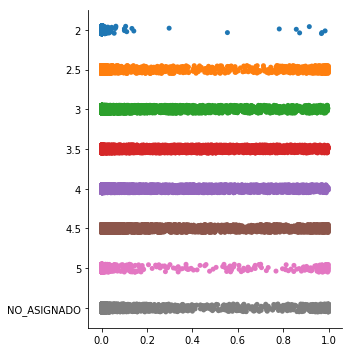

In [416]:
sb.catplot(data=visual_sample,kind="strip", orient="h"
          )

In [234]:
# Categorical distribution plots:

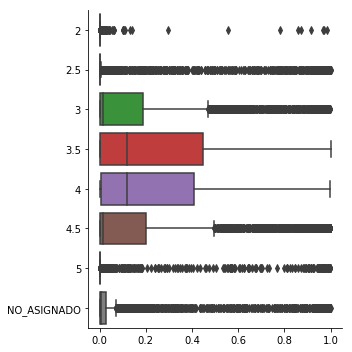

In [417]:
sb.catplot(data=visual_sample,kind="box", orient="h"
          )

In [382]:
visual_sample["3"][777]

0.0001232053982284317

In [384]:
visual_sample[777:778]

,2,2.5,3,3.5,4,4.5,5,NO_ASIGNADO
777,0.000005,0.006461,0.000123,0.170818,0.642164,0.171954,0.000121,0.008353


In [412]:
visual_sample["3"][:]

0       0.177497
1       0.003434
2       0.022254
3       0.598897
4       0.003015
          ...   
4995    0.100460
4996    0.000788
4997    0.042129
4998    0.005927
4999    0.679808
Name: 3, Length: 5000, dtype: float64

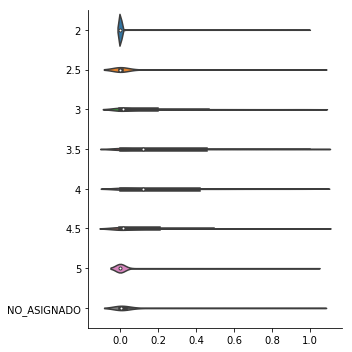

In [418]:
sb.catplot(data=visual_sample,kind="violin", orient="h"
          )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

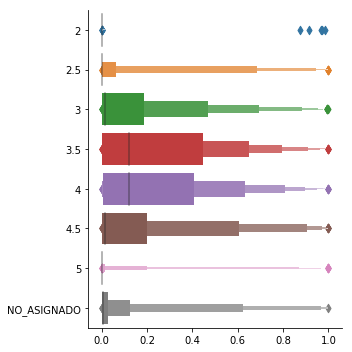

In [415]:
sb.catplot(data=visual_sample,kind="boxen", orient="h"
          )

In [238]:
# Categorical estimate plots:

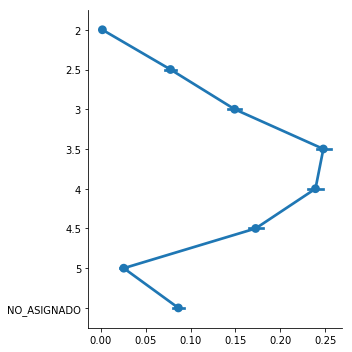

In [419]:
sb.catplot(data=visual_sample,kind="point", orient="h"
          )

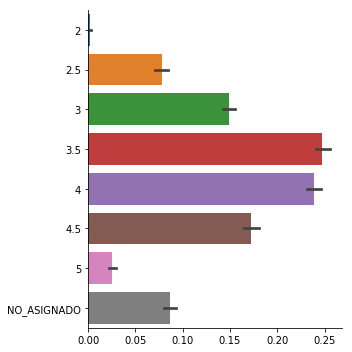

In [420]:
sb.catplot(data=visual_sample,kind="bar", orient="h"
          )

In [421]:
X_test.shape

(61237, 3043)

In [422]:
visual_sample.columns

Index(['2', '2.5', '3', '3.5', '4', '4.5', '5', 'NO_ASIGNADO'], dtype='object')

In [243]:
### CHIMPUM FINAL

In [423]:
!date

vie ene  3 18:48:37 CET 2020
